Implementing Multiple Linear Regression
Objective
To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [10]:
# Importing the dataset
dataset = pd.read_csv("/content/50_Startups.csv")

In [11]:
len(dataset)

50

In [13]:
dataset.head(5)  #Profit is our Dependent variable

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
dataset.shape

(50, 5)

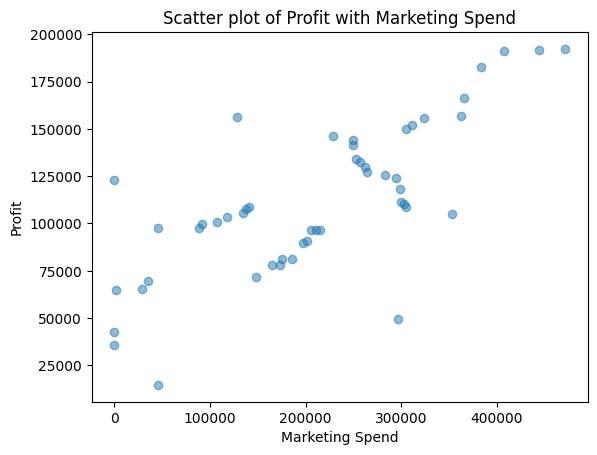

In [16]:
#Scatter plot to find Corelations between variables (Profit and Marketing)

plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

#It shows Correlation

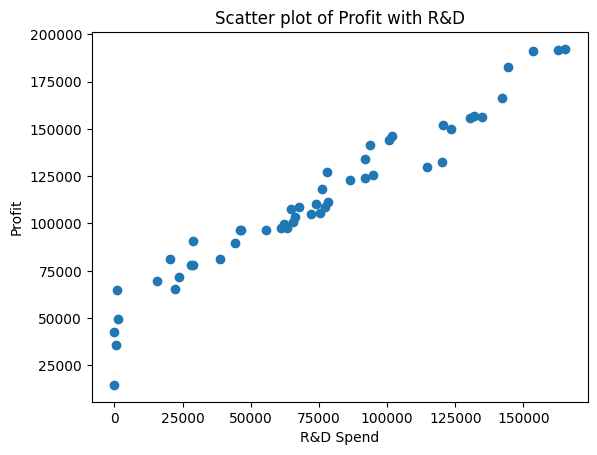

In [22]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'])#, alpha=0.5)
plt.title('Scatter plot of Profit with R&D')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

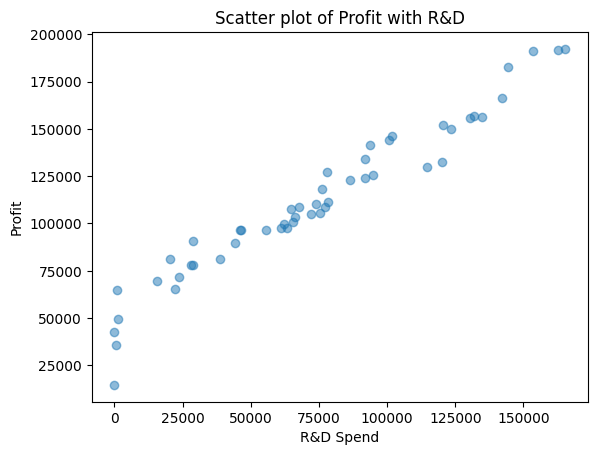

In [21]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)   #with Alpha
plt.title('Scatter plot of Profit with R&D')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

#It shows Correlation

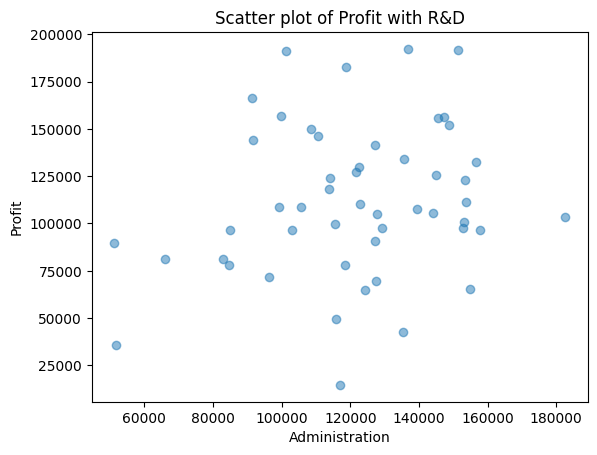

In [23]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)   #with Alpha
plt.title('Scatter plot of Profit with R&D')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

#It Show's No Correlation
#Business Persepective - Expense of Administration is for internal development so it doesn't contribute to any external profits

Text(0, 0.5, 'Profit')

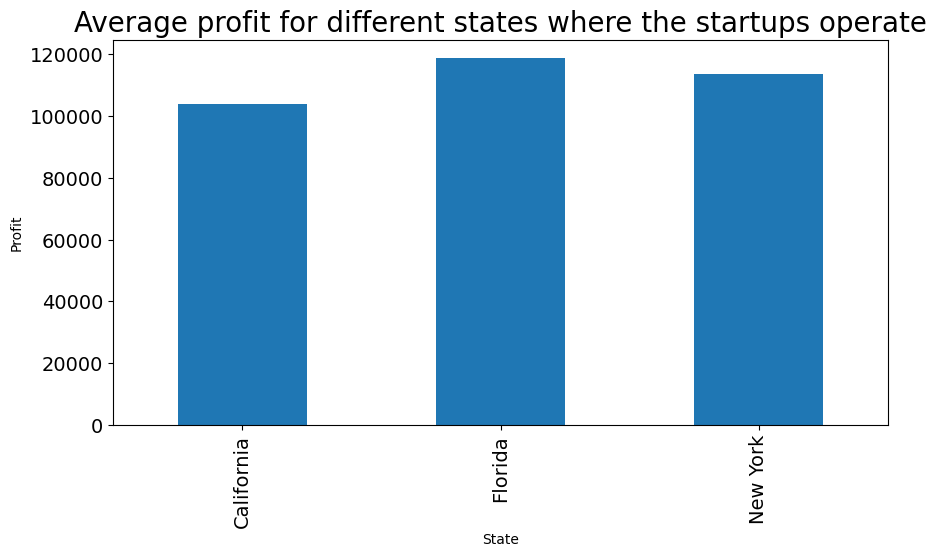

In [25]:
# Create the figure object
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 10)
ax.set_ylabel("Profit", fontsize = 10)

#Operating expense (Rent,Taxes,etc) could be higher in california compared to other states that's why profit margins are on a lower side

In [26]:
dataset.State.value_counts()


New York      17
California    17
Florida       16
Name: State, dtype: int64

In [27]:
# Y_hat = B0 + B1.X1 + B2.X2 + B3.X3 + B4.X4
#But our X4 is a categorical variable i.e. State name so this doesn't make sanse, So we have to transform the 'States' in such way that they can fit in our model
# So we'll do One Hot Encoding Technique
#Wherever the state is New york the value will be 1 rest will be 0
#Wherever the state is California the value will be 1 rest will be 0
#Wherever the state is Florida the value will be 1 rest will be 0



# Create dummy variables for the catgeorical variable State
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)


In [28]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [29]:
#Creating a variable 'dependent_variable' and giving it string 'profit'

dependent_variable = 'Profit'

In [30]:
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [31]:
independent_variables

['California_State',
 'Administration',
 'Marketing Spend',
 'NewYork_State',
 'R&D Spend',
 'Florida_State']

In [32]:
#Step 1 We have to seperate the independent variables and dependent variables

# Create the data of independent variables
X = dataset[independent_variables].values   #.values will convert df to array

# Create the dependent variable data
y = dataset[dependent_variable].values      #.values will convert df to array


In [33]:
dataset[independent_variables]


,California_State,Administration,Marketing Spend,NewYork_State,R&D Spend,Florida_State
0,0,136897.80,471784.10,1,165349.20,0
1,1,151377.59,443898.53,0,162597.70,0
2,0,101145.55,407934.54,0,153441.51,1
3,0,118671.85,383199.62,1,144372.41,0
4,0,91391.77,366168.42,0,142107.34,1
5,0,99814.71,362861.36,1,131876.90,0
6,1,147198.87,127716.82,0,134615.46,0
7,0,145530.06,323876.68,0,130298.13,1
8,0,148718.95,311613.29,1,120542.52,0
9,1,108679.17,304981.62,0,123334.88,0


In [34]:
#Step 2 We need to do train test split
#what should be size of train and test... (80% train 20%test)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  #random set will give same set of observations



In [35]:
X_train[0:10]

array([[0.0000000e+00, 1.0305749e+05, 2.1463481e+05, 0.0000000e+00,
        5.5493950e+04, 1.0000000e+00],
       [0.0000000e+00, 8.5047440e+04, 2.0551764e+05, 1.0000000e+00,
        4.6014020e+04, 0.0000000e+00],
       [0.0000000e+00, 1.4413598e+05, 1.3405007e+05, 0.0000000e+00,
        7.5328870e+04, 1.0000000e+00],
       [1.0000000e+00, 1.5769392e+05, 2.1079767e+05, 0.0000000e+00,
        4.6426070e+04, 0.0000000e+00],
       [0.0000000e+00, 1.1417579e+05, 2.9491957e+05, 0.0000000e+00,
        9.1749160e+04, 1.0000000e+00],
       [0.0000000e+00, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        1.3029813e+05, 1.0000000e+00],
       [0.0000000e+00, 1.5654742e+05, 2.5651292e+05, 0.0000000e+00,
        1.1994324e+05, 1.0000000e+00],
       [0.0000000e+00, 1.2415304e+05, 1.9039300e+03, 1.0000000e+00,
        1.0002300e+03, 0.0000000e+00],
       [0.0000000e+00, 5.1743150e+04, 0.0000000e+00, 1.0000000e+00,
        5.4205000e+02, 0.0000000e+00],
       [0.0000000e+00, 1.5303206e+05,

In [36]:
#Step 3 Transformation... Varaibles should be on a similar scale between 0 and 1
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X_train[0:10]

array([[0.        , 0.48655174, 0.45494286, 0.        , 0.33561668,
        1.        ],
       [0.        , 0.3173015 , 0.43561799, 1.        , 0.2782839 ,
        0.        ],
       [0.        , 0.87258866, 0.28413435, 0.        , 0.45557444,
        1.        ],
       [1.        , 1.        , 0.44680961, 0.        , 0.2807759 ,
        0.        ],
       [0.        , 0.59103645, 0.62511553, 0.        , 0.55488118,
        1.        ],
       [0.        , 0.88568959, 0.68649342, 0.        , 0.7880179 ,
        1.        ],
       [0.        , 0.98922572, 0.54370828, 0.        , 0.72539353,
        1.        ],
       [0.        , 0.6847981 , 0.0040356 , 1.        , 0.0060492 ,
        0.        ],
       [0.        , 0.00432296, 0.        , 1.        , 0.00327821,
        0.        ],
       [0.        , 0.95618996, 0.22709197, 1.        , 0.39676926,
        0.        ]])

In [38]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
regressor.intercept_

44153.954667848564

In [40]:
regressor.coef_

#coefficient i.e. B betas of California_State = 8.66
	#Administration = 3.49
  #Marketing Spend	 = 1.72
  #NewYork_State = 7.86
  #R&D Spend	=1.27
  #Florida_State = -8.72

array([ 8.66383692e+01,  3.49927567e+03,  1.72720281e+04,  7.86007422e+02,
        1.27892182e+05, -8.72645791e+02])

In [48]:
y_pred_train = regressor.predict(X_train)  #Predicted Values on train dataset

In [49]:
y_pred_train #Actual Valueson train dataset

array([ 95764.42320496,  89164.62849777, 109506.72329085,  91366.2188941 ,
       127111.48666646, 159019.04337114, 148905.9881254 ,  48179.60744028,
        45374.34722508, 102951.9596798 , 145449.63178399,  96684.71387299,
        97535.3576194 , 116571.15139254,  69421.13311312, 116212.62095133,
        60736.53267612, 152787.95464277, 127413.0337311 , 102210.16391827,
       161822.7226407 , 131583.61511491,  75019.09161337,  48054.91969394,
       189547.28196893, 127528.92248422,  85540.50570954, 111255.8251405 ,
       156191.10124356, 108464.25100331,  75306.81185049, 119915.38726755,
       115144.58914955, 152688.90677959,  81513.47163492,  57298.28613018,
       172852.28336637, 192919.57537462,  47007.62737751,  65835.99435878])

In [43]:
#Predicting the Test Set Results
y_pred = regressor.predict(X_test)

In [44]:
#predicted profit on test data
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [45]:
#Actual profits on test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [46]:
mean_squared_error(y_test, y_pred)


83502864.03257737

In [51]:
# Test performance
# RMSE
math.sqrt(mean_squared_error(y_test, y_pred))


9137.990152794944

In [50]:
# Train performance
# RMSE
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.666612578969

In [52]:
#Test R2 Score
r2_score(y_test, y_pred)

0.9347068473282425

In [53]:
#Train R2 Score
r2_score(y_train, y_pred_train)

0.9501847627493607